In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Problem Statement:
- The dataset contains various chemical and physical properties of wines along with their quality ratings. The goal is to group similar wines based on their attributes (like acidity, sugar, pH, etc.) using clustering techniques. This can help in identifying patterns or categories of wines that share similar characteristics, which might assist in product categorization or quality analysis.

Objective:
- Perform clustering on the dataset to group wines into distinct clusters based on their properties.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv(r"C:\Users\SHRI\OneDrive\Desktop\DataScience_DataFiles\data\wine_qualiy.csv")

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Data Understanding

In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

# Data Preprocessing

In [10]:
# Remove output vriable

df= df.drop(columns = ['quality'])


In [11]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [12]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [13]:
# Handle the skewness
from scipy.stats import boxcox

df['residual sugar'], Param = boxcox(df['residual sugar'])
df['chlorides'], Param = boxcox(df['chlorides'])
df['free sulfur dioxide'], Param = boxcox(df['free sulfur dioxide'])
df['sulphates'], Param = boxcox(df['sulphates'])
df['total sulfur dioxide'], Param = boxcox(df['total sulfur dioxide'])



In [14]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar         -0.095930
chlorides              -0.499643
free sulfur dioxide    -0.019778
total sulfur dioxide   -0.008028
density                 0.071288
pH                      0.193683
sulphates              -0.024779
alcohol                 0.860829
dtype: float64

In [15]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

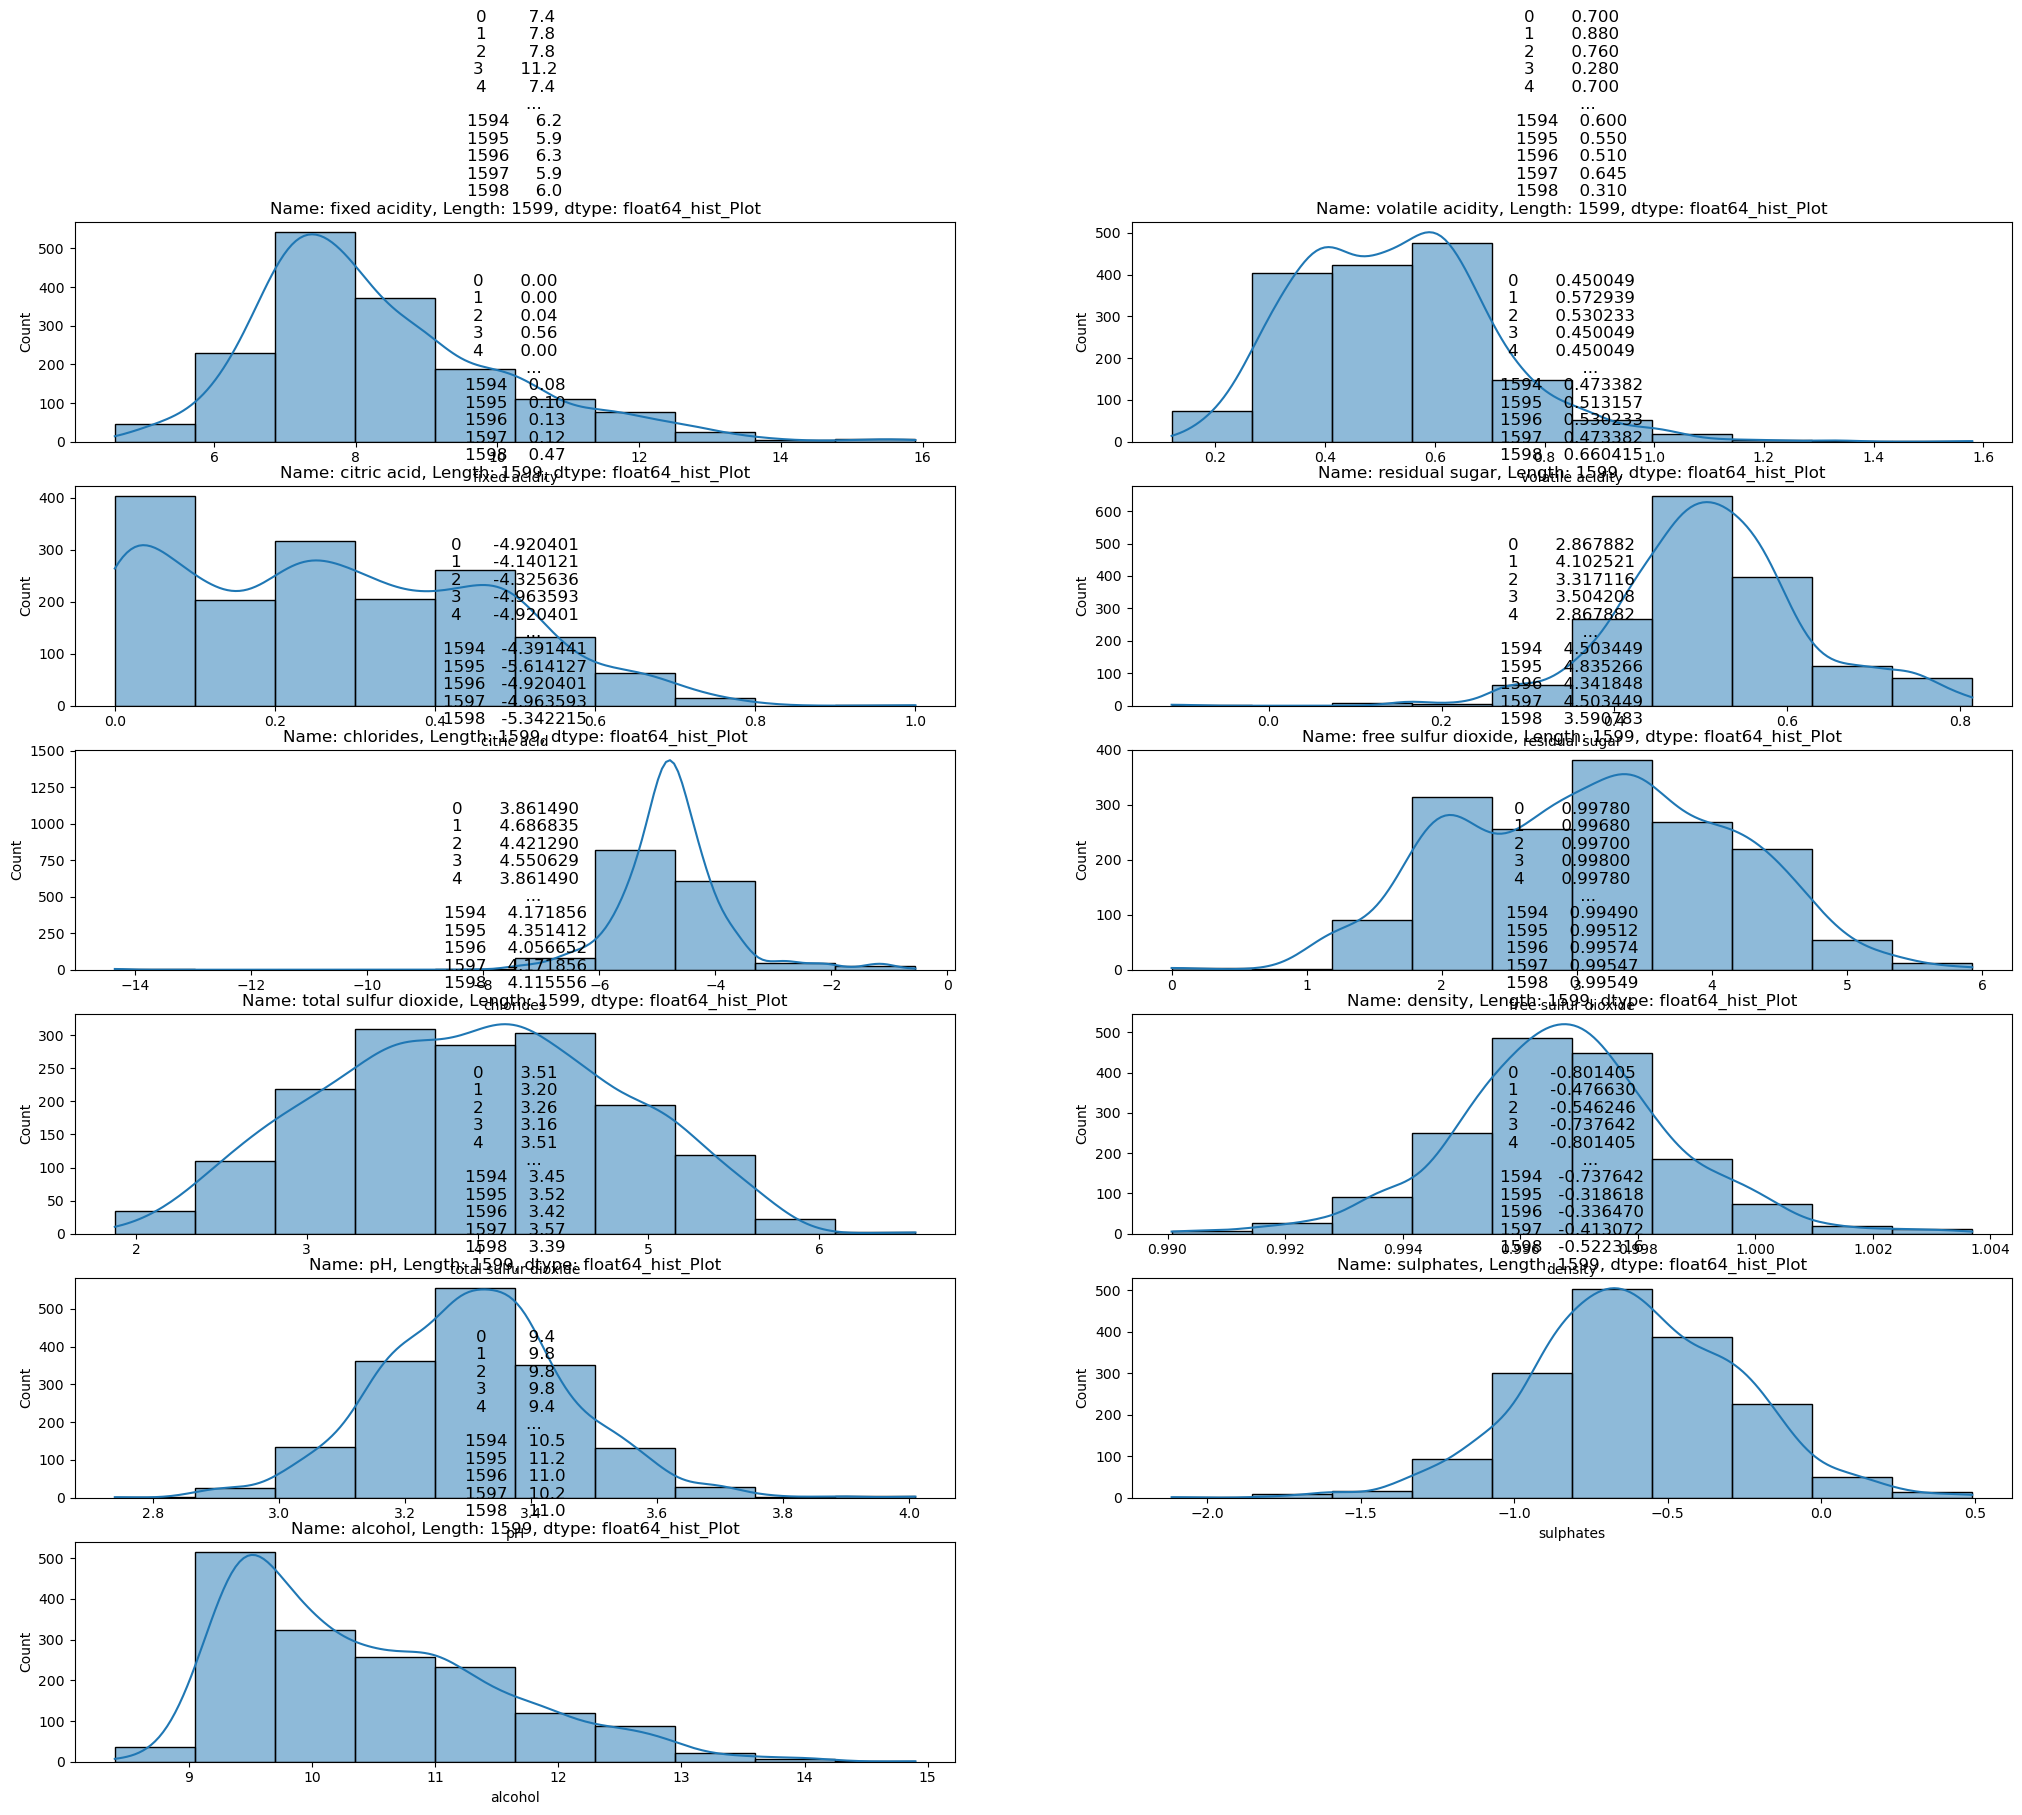

In [16]:
j=1
plt.figure(figsize=(25,20))
for i in df:
    plt.subplot(6,2,j)
    sns.histplot(data=df, x=df[i], bins = 10 , kde = True)
    plt.title(f'{df[i]}_hist_Plot')
    j=j+1
plt.show()

<Axes: >

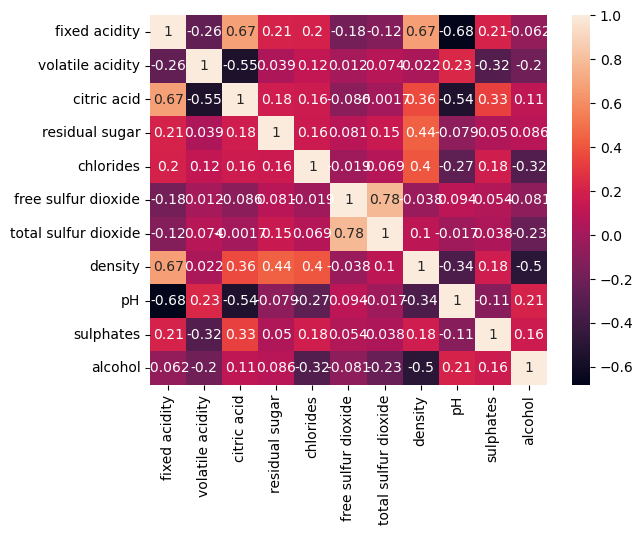

In [17]:
c_m = df.corr()
sns.heatmap(c_m, annot = True)

In [18]:
continous = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [19]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,0.450049,-4.920401,2.867882,3.861490,0.9978,3.51,-0.801405,9.4
1,7.8,0.88,0.00,0.572939,-4.140121,4.102521,4.686835,0.9968,3.20,-0.476630,9.8
2,7.8,0.76,0.04,0.530233,-4.325636,3.317116,4.421290,0.9970,3.26,-0.546246,9.8
3,11.2,0.28,0.56,0.450049,-4.963593,3.504208,4.550629,0.9980,3.16,-0.737642,9.8
4,7.4,0.70,0.00,0.450049,-4.920401,2.867882,3.861490,0.9978,3.51,-0.801405,9.4


In [21]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,0.513556,-4.763474,3.129049,3.965719,0.996747,3.311113,-0.609663,10.422983
std,1.741096,0.179060,0.194801,0.110080,0.962770,0.985817,0.846175,0.001887,0.154386,0.340693,1.065668
min,4.600000,0.120000,0.000000,-0.112192,-14.348450,0.000000,1.875723,0.990070,2.740000,-2.114887,8.400000
25%,7.100000,0.390000,0.090000,0.450049,-5.192858,2.248371,3.346596,0.995600,3.210000,-0.835081,9.500000
50%,7.900000,0.520000,0.260000,0.513157,-4.795645,3.215430,3.994882,0.996750,3.310000,-0.622818,10.200000
75%,9.200000,0.640000,0.420000,0.572939,-4.391441,3.827881,4.591023,0.997835,3.400000,-0.373689,11.100000
max,15.900000,1.580000,1.000000,0.813867,-0.552596,5.926269,6.564923,1.003690,4.010000,0.490605,14.900000


In [22]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

# Standardization

- same priority to all columns

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_standardized = scaler.fit_transform(df)

df = pd.DataFrame(df_standardized, columns=df.columns)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.577089,-0.163047,-0.265007,-0.123215,0.558274,1.288643,-0.562977,-0.960246
1,-0.298547,1.967442,-1.391472,0.539619,0.647660,0.987787,0.852473,0.028261,-0.719933,0.390599,-0.584777
2,-0.298547,1.297065,-1.186070,0.151544,0.454911,0.190833,0.538557,0.134264,-0.331177,0.186200,-0.584777
3,1.654856,-1.384443,1.484154,-0.577089,-0.207923,0.380675,0.691456,0.664277,-0.979104,-0.375760,-0.584777
4,-0.528360,0.961877,-1.391472,-0.577089,-0.163047,-0.265007,-0.123215,0.558274,1.288643,-0.562977,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.365068,0.386540,1.394610,0.243686,-0.978765,0.899886,-0.375760,0.072294
1595,-1.390155,0.123905,-0.877968,-0.003620,-0.883824,1.731306,0.455950,-0.862162,1.353436,0.854542,0.729364
1596,-1.160343,-0.099554,-0.723916,0.151544,-0.163047,1.230633,0.107497,-0.533554,0.705508,0.802125,0.541630
1597,-1.390155,0.654620,-0.775267,-0.365068,-0.207923,1.394610,0.243686,-0.676657,1.677400,0.577213,-0.209308


In [24]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,1.733031e-16,-8.887339e-17,-9.509452e-16,-5.332403e-17,-3.554936e-17,-2.132961e-16,-3.473172e-14,2.861723e-15,1.022044e-16,7.109871e-17
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-5.686241e+00,-9.958743e+00,-3.175059e+00,-2.470706e+00,-3.538731e+00,-3.700401e+00,-4.419510e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-5.770892e-01,-4.461278e-01,-8.936276e-01,-7.319016e-01,-6.077557e-01,-6.551405e-01,-6.618531e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-3.620423e-03,-3.342580e-02,8.765162e-02,3.447519e-02,1.760083e-03,-7.212705e-03,-3.862326e-02,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,5.396186e-01,3.865399e-01,7.091083e-01,7.392082e-01,5.768249e-01,5.759223e-01,6.928456e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,2.728957e+00,4.375081e+00,2.838352e+00,3.072670e+00,3.680055e+00,4.528282e+00,3.230514e+00,4.202453e+00


# Find the Optimal Number of Clusters (k)

In [25]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k , init = 'k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

wcss

[17588.99999999999,
 14277.012725894021,
 12607.842152082185,
 11345.407612510118,
 10623.355434688174,
 10144.695653742712,
 9725.138655391198,
 9152.319186502255,
 8984.047571249059,
 8584.97973966021]

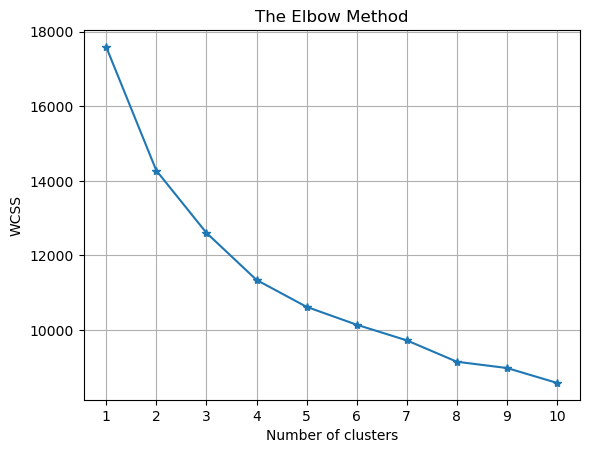

In [26]:
# using elbow method also can find k 

plt.plot(range(1,11), wcss, marker = "*")
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

 # KMeans Clustering

In [27]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = True)

df['km_cluster'] = kmeans.fit_predict(df)

kmeans

KMeans(n_clusters=4, random_state=True)

In [28]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,km_cluster
0,-0.528360,0.961877,-1.391472,-0.577089,-0.163047,-0.265007,-0.123215,0.558274,1.288643,-0.562977,-0.960246,1
1,-0.298547,1.967442,-1.391472,0.539619,0.647660,0.987787,0.852473,0.028261,-0.719933,0.390599,-0.584777,2
2,-0.298547,1.297065,-1.186070,0.151544,0.454911,0.190833,0.538557,0.134264,-0.331177,0.186200,-0.584777,2
3,1.654856,-1.384443,1.484154,-0.577089,-0.207923,0.380675,0.691456,0.664277,-0.979104,-0.375760,-0.584777,0
4,-0.528360,0.961877,-1.391472,-0.577089,-0.163047,-0.265007,-0.123215,0.558274,1.288643,-0.562977,-0.960246,1


<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

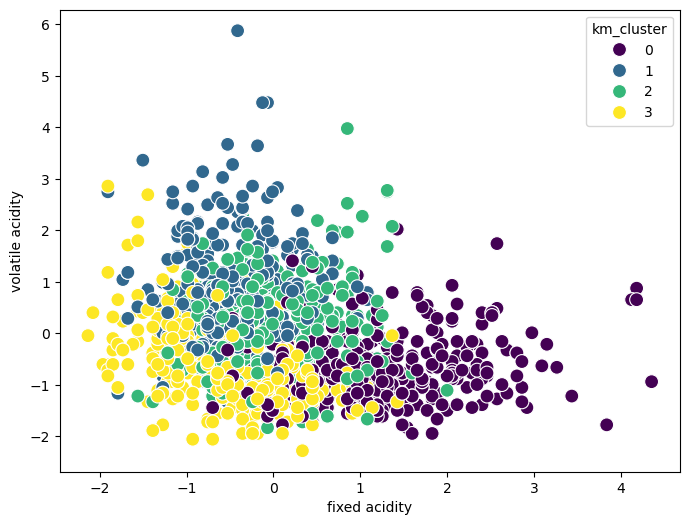

In [29]:
# Step 4: Visualize Clusters (Example with first two features)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, x='fixed acidity', y='volatile acidity', hue='km_cluster', palette='viridis', s=100)

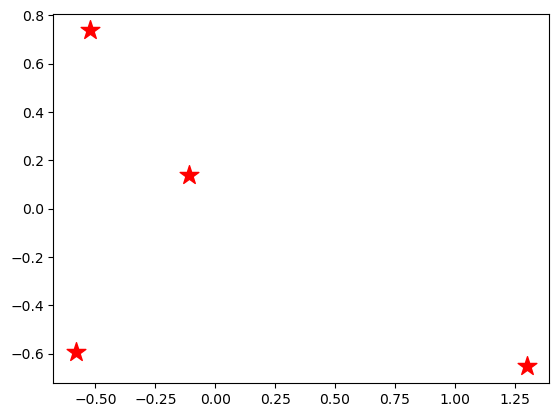

In [30]:
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    color='red', marker='*', s=200, label='Centroids'
)

In [31]:
df['km_cluster'].value_counts()

km_cluster
1    471
2    469
0    361
3    298
Name: count, dtype: int64

In [32]:
from sklearn.metrics import silhouette_score


# Step 5: Evaluate Clustering with Silhouette Score
sil_score = silhouette_score(df.drop(columns=['km_cluster']), df['km_cluster'])
print(f'Silhouette Score: {sil_score:.2f}')



# Silhouette Score:

#Evaluates the quality of clustering. A score closer to 1 indicates well-separated clusters.


Silhouette Score: 0.16


In [33]:
df[df['km_cluster'] == 0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,km_cluster
3,1.654856,-1.384443,1.484154,-0.577089,-0.207923,0.380675,0.691456,0.664277,-0.979104,-0.375760,-0.584777,0
13,-0.298547,0.459094,0.097691,-1.388687,1.087031,-0.549193,-0.347189,0.346269,-0.331177,2.830680,-1.241848,0
19,-0.241094,-1.160984,1.227401,-0.814919,3.505009,0.380675,0.591241,0.081262,-1.756618,2.007019,-1.147981,0
42,-0.470907,-0.211283,-0.364463,0.539619,3.459266,-0.712183,-1.349828,0.028261,-0.655141,1.462718,0.072294,0
47,0.218530,-1.328579,1.278752,-1.388687,1.062259,-0.139188,-0.003415,0.081262,-0.395969,-0.375760,-0.866379,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1507,-0.470907,-0.825796,1.535504,0.151544,0.879436,-1.335543,-1.557353,-0.369250,0.316751,-0.661853,0.917099,0
1508,-0.700719,-1.440308,1.689555,-0.174963,-0.253680,0.380675,-0.554550,0.738479,0.446337,0.635857,0.166161,0
1518,-0.528360,-0.323013,0.970649,-0.003620,1.087031,-0.893628,-0.863385,-0.146644,0.057580,0.038771,0.072294,0
1543,1.597403,-0.490607,0.765247,-0.003620,-0.766963,0.087652,-0.933884,0.441671,-0.395969,-0.467675,-0.021574,0


In [34]:
df[df['km_cluster'] == 1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,km_cluster
0,-0.528360,0.961877,-1.391472,-0.577089,-0.163047,-0.265007,-0.123215,0.558274,1.288643,-0.562977,-0.960246,1
4,-0.528360,0.961877,-1.391472,-0.577089,-0.163047,-0.265007,-0.123215,0.558274,1.288643,-0.562977,-0.960246,1
5,-0.528360,0.738418,-1.391472,-0.814919,-0.207923,-0.022035,0.107497,0.558274,1.288643,-0.562977,-0.960246,1
6,-0.241094,0.403229,-1.083370,-1.388687,-0.496761,0.190833,0.667011,-0.183745,-0.072005,-1.752012,-0.960246,1
7,-0.585813,0.682553,-1.391472,-3.176105,-0.710509,0.190833,-0.796157,-1.137769,0.511130,-1.609596,-0.397043,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1577,-1.217796,0.961877,-0.621215,1.906715,-0.163047,-0.022035,-0.447221,-0.279147,1.483021,-0.201398,1.386435,1
1578,-0.873078,0.794282,-0.621215,-0.814919,1.183038,-0.022035,-0.863385,-0.713758,0.705508,0.324563,0.823232,1
1591,-1.677421,1.185336,-0.929318,-1.083409,0.351518,0.288292,-0.499905,-1.445177,2.325327,-0.562977,1.104833,1
1594,-1.217796,0.403229,-0.980669,-0.365068,0.386540,1.394610,0.243686,-0.978765,0.899886,-0.375760,0.072294,1


In [35]:
df[df['km_cluster'] == 2]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,km_cluster
1,-0.298547,1.967442,-1.391472,0.539619,0.647660,0.987787,0.852473,0.028261,-0.719933,0.390599,-0.584777,2
2,-0.298547,1.297065,-1.186070,0.151544,0.454911,0.190833,0.538557,0.134264,-0.331177,0.186200,-0.584777,2
9,-0.470907,-0.155419,0.457144,2.121070,-0.396538,0.380675,1.474053,0.558274,0.251958,1.050716,0.072294,2
11,-0.470907,-0.155419,0.457144,2.121070,-0.396538,0.380675,1.474053,0.558274,0.251958,1.050716,0.072294,2
14,0.333436,0.514959,-0.467164,1.439470,2.192192,2.238507,2.004582,0.982285,-0.979104,1.388035,-1.147981,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1572,-0.585813,0.906012,0.251743,-0.003620,-0.496761,1.545931,1.503093,-0.226146,0.122373,-1.097409,-0.866379,2
1574,-1.562514,-1.216849,2.613864,2.687377,-0.253680,0.853634,1.320217,0.012360,0.511130,-1.473295,0.072294,2
1583,-1.217796,-0.378878,0.097691,-0.174963,-0.253680,1.394610,1.414314,-0.512353,0.122373,-0.038623,-0.584777,2
1589,-0.987984,1.101539,-0.364463,2.350484,-0.300348,1.230633,1.094562,0.505273,-0.136798,-0.764507,-1.147981,2


In [36]:
df[df['km_cluster'] == 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,km_cluster
45,-2.137045,-0.043689,-0.621215,-0.174963,-1.412566,-0.712183,0.808162,-1.773786,3.815561,-0.562977,2.512842,3
84,-1.160343,-1.272714,1.073350,-0.814919,-0.496761,0.468524,0.715518,-0.448752,0.835093,0.955222,-0.115441,3
95,-2.079592,0.403229,-0.518514,0.151544,-1.134901,0.380675,1.531608,-1.879789,3.491597,-0.201398,2.325108,3
131,-1.562514,-0.155419,-0.929318,0.151544,-1.804974,0.380675,1.429463,-1.614782,2.066156,0.038771,2.418975,3
132,-1.562514,-0.155419,-0.929318,0.151544,-1.804974,0.380675,1.429463,-1.614782,2.066156,0.038771,2.418975,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1590,-1.160343,0.123905,-0.621215,-0.814919,-0.119023,1.051452,-0.082204,-1.911589,0.057580,1.141411,1.104833,3
1592,-1.160343,-0.099554,-0.723916,0.151544,-0.163047,1.230633,0.107497,-0.533554,0.705508,0.802125,0.541630,3
1595,-1.390155,0.123905,-0.877968,-0.003620,-0.883824,1.731306,0.455950,-0.862162,1.353436,0.854542,0.729364,3
1596,-1.160343,-0.099554,-0.723916,0.151544,-0.163047,1.230633,0.107497,-0.533554,0.705508,0.802125,0.541630,3


In [37]:
df[df['km_cluster'] == 4]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,km_cluster


In [38]:
df['km_cluster'].value_counts()

km_cluster
1    471
2    469
0    361
3    298
Name: count, dtype: int64

# HIERARCHICAL CLUSTERING

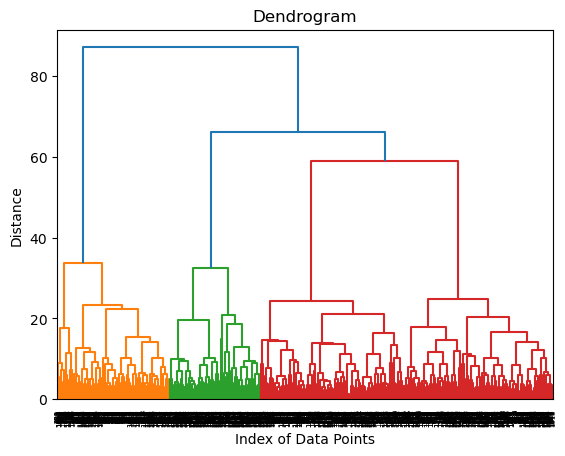

In [39]:
import scipy.cluster.hierarchy as sch

data = sch.linkage(df, method = 'ward')

dendrogram = sch.dendrogram(data)

plt.title('Dendrogram')
plt.xlabel('Index of Data Points')
plt.ylabel("Distance")
plt.show()

**Hirarchical clustering model**

In [40]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')

hc

AgglomerativeClustering(n_clusters=4)

In [41]:
df['h_cluster'] = hc.fit_predict(df)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,km_cluster,h_cluster
0,-0.528360,0.961877,-1.391472,-0.577089,-0.163047,-0.265007,-0.123215,0.558274,1.288643,-0.562977,-0.960246,1,1
1,-0.298547,1.967442,-1.391472,0.539619,0.647660,0.987787,0.852473,0.028261,-0.719933,0.390599,-0.584777,2,3
2,-0.298547,1.297065,-1.186070,0.151544,0.454911,0.190833,0.538557,0.134264,-0.331177,0.186200,-0.584777,2,3
3,1.654856,-1.384443,1.484154,-0.577089,-0.207923,0.380675,0.691456,0.664277,-0.979104,-0.375760,-0.584777,0,0
4,-0.528360,0.961877,-1.391472,-0.577089,-0.163047,-0.265007,-0.123215,0.558274,1.288643,-0.562977,-0.960246,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.365068,0.386540,1.394610,0.243686,-0.978765,0.899886,-0.375760,0.072294,1,1
1595,-1.390155,0.123905,-0.877968,-0.003620,-0.883824,1.731306,0.455950,-0.862162,1.353436,0.854542,0.729364,3,2
1596,-1.160343,-0.099554,-0.723916,0.151544,-0.163047,1.230633,0.107497,-0.533554,0.705508,0.802125,0.541630,3,2
1597,-1.390155,0.654620,-0.775267,-0.365068,-0.207923,1.394610,0.243686,-0.676657,1.677400,0.577213,-0.209308,1,1


<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

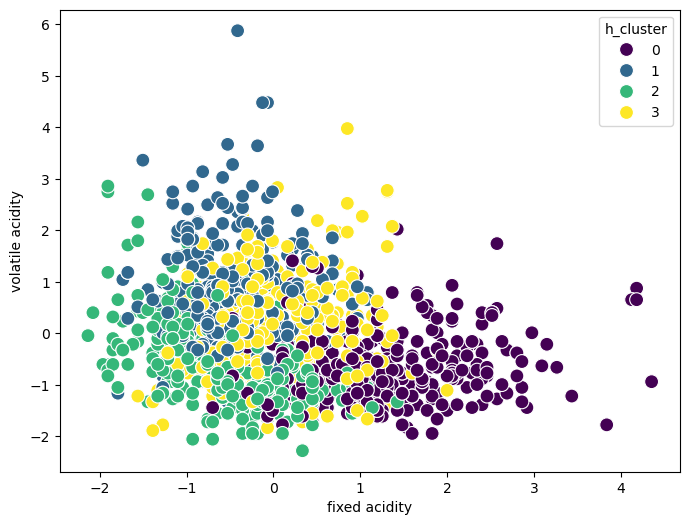

In [42]:
# Step 4: Visualize Clusters (Example with first two features)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, x='fixed acidity', y='volatile acidity', hue='h_cluster', palette='viridis', s = 100)

In [43]:
df['h_cluster'].value_counts()

h_cluster
1    479
3    464
0    364
2    292
Name: count, dtype: int64

# DBSCAN CLUSTERING

In [44]:
from sklearn.cluster import DBSCAN
for r in range(1,10):
    for m in range(3,10):
        dbs = DBSCAN(eps = r, min_samples = m)
        df['db_cluster'] = dbs.fit_predict(df)
    if df['db_cluster'].nunique() == 5:
        break
print("eps : ", r)
print("min: " , m)
        

eps :  1
min:  9


In [45]:
dbs

DBSCAN(eps=1, min_samples=9)

In [46]:
dbs = DBSCAN(eps = 1, min_samples = 9)

df['db_cluster'] = dbs.fit_predict(df)


<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

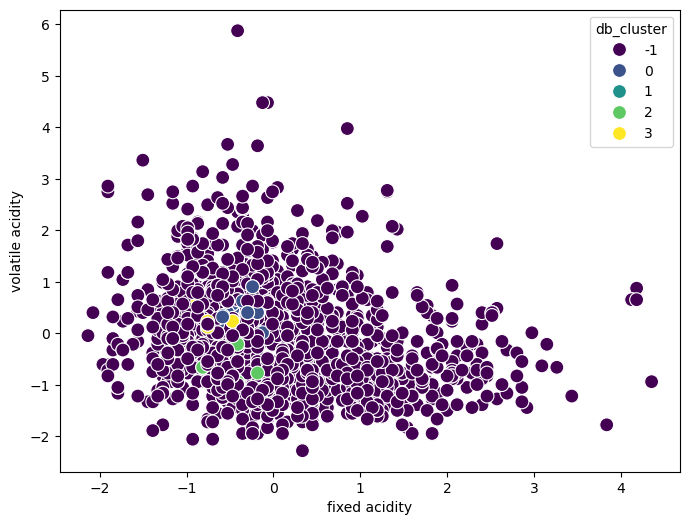

In [47]:
# Step 4: Visualize Clusters (Example with first two features)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, x='fixed acidity', y='volatile acidity', hue='db_cluster', palette='viridis', s = 100)

In [48]:
df['db_cluster'].value_counts()

db_cluster
-1    1528
 0      29
 2      15
 1      14
 3      13
Name: count, dtype: int64